# BUS 32100, Week 2
# HW 1 

This assignment will be a guided tour of exploratory data analysis (EDA) through the use of the `Pandas` and `Seaborn` packages. We will be using data on [Seattle home prices](https://www.kaggle.com/harlfoxem/housesalesprediction). The dataset we'll be using is on Canvas, the link to the original data is provided as an FYI.

**To complete this assignment, follow the direction and replace all the `todo`'s with Python code!**

### What is exploratory data analysis (EDA) and why is it important

In class, we talked about the data analytics workflow. The first step is asking the right question. The second step is EDA, or exploratory data analysis. The EDA step comes before we run predictive models, such as linear regression. 

EDA, as its name suggets, is exploratory, meaning that we don't start with assumptions to test. The intention of EDA is to uncover patterns or trends in the data that can lead us to hypotheses or to further data collection. There is not one prescribed way to undertake EDA, and so it is part science but also part art. You will learn from experience what to look for and how to visualize your data to see its potential. Data summaries, such as min and max, and visualizations such as heatmaps are fundamental tools in the EDA toolbox. 

You may have analyzed data in Excel in the past. In that case, you probably opened up the dataset in Excel and were able to scroll through the entire thing to visually inspect it for anomalies, outliers, trends and patterns. Data analytics with R and Python is very different though! Your datasets will often be too big to meaningfully visually examine the whole thing. Even when we're working with small datasets, however, you'll want to get into the habit of using the tools of EDA such as scatter plots, heatmaps, and summary statistics. 

### 1. Setting up our environment by importing the necessary libraries

For this task, we will be using `Pandas` and `Seaborn`. You will learn how to use these libraries as you complete this assignment. For our first task, import Pandas and Seaborn. 

In [78]:
# import pandas and seaborn 
# remember that programmers are lazy, so we'll also want to import our libraries as their shortened names! 
# Pandas is usually imported as pd
# Seaborn is usually imported as sns

import pandas as pd
import seaborn as sns

### 2. Read in the Seattle (King County) housing dataset using `Pandas`

The workhorse of the `Pandas` library is the `dataframe`. A dataframe (df) is similar to an Excel sheet and is a way to organize our data by rows and columns. Jupyter Notebooks and Pandas dataframes work particularly well together because Jupyter formats dataframe excerpts nicely. You may be used to visually inspecting an entire dataset in Excel. We don't do that in Python! Not just because the datasets we work with are too large, but because relying on visual inspection can miss important trends. So get in the habit of using our data analysis tools. 

To read in a CSV (comma separated values) file, you'll want to use the `Pandas` function `read_csv` and to assign the resulting dataframe to a new variable. It'll look like this: 

`df = pd.read_csv('path/to/your/file.csv')`

**Use a better and more descriptive name than df, though!**

In [34]:
# todo read in dataset (the name is kc_housing, for King County, where Seattle is located)
kc_housing = pd.read_csv('kc_house_data.csv')

Examine the first few rows of the dataframe with `df.head()`. To do this, you'll want to start with your dataframe, then use the dot operator to call the `head()` function. As input, `head()` takes in an integer and will return that many rows back to you. Call `head()` with an input of `7` to see the first 7 rows. 

In [35]:
# todo head
kc_housing.head(7)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


Examine a random sample of the dataframe with `df.sample(x)` where x is the number of rows you'd like to examine. Pick any `x` you'd like (but be sure not to make it too big!). 

In [41]:
# todo sample
kc_housing.sample(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3736,9297301015,20150408T000000,277284.0,3,1.75,1030,4800,1.0,0,0,...,6,930,100,1927,0,98126,47.5660,-122.373,1540,4800
16010,4305600250,20141027T000000,540000.0,4,2.50,3000,5471,2.0,0,0,...,8,3000,0,2013,0,98059,47.4797,-122.126,2730,5471
17260,3904950190,20140527T000000,500000.0,3,2.25,1760,4539,2.0,0,0,...,8,1760,0,1988,0,98029,47.5754,-122.013,1960,4808
7352,3459800020,20150406T000000,560000.0,4,1.75,2230,6838,1.0,0,0,...,7,1320,910,1985,0,98008,47.5742,-122.118,1580,7500
10513,1829300270,20140821T000000,715000.0,4,2.50,2780,13521,2.0,0,0,...,10,2780,0,1987,0,98074,47.6374,-122.042,2980,11454
20678,1332700030,20150312T000000,293000.0,2,2.25,1610,1968,2.0,0,0,...,7,1610,0,1979,0,98056,47.5184,-122.196,1950,1968
18377,3438502731,20150401T000000,323000.0,3,1.50,1720,7110,1.0,0,0,...,8,1720,0,1955,0,98106,47.5417,-122.355,1730,6840
20796,8096800260,20150407T000000,272000.0,3,2.50,1528,7616,2.0,0,0,...,7,1528,0,2011,0,98030,47.3774,-122.186,1850,7340
4339,3760500336,20141126T000000,2125000.0,4,2.75,3190,19513,2.0,0,4,...,10,3190,0,1982,0,98034,47.6991,-122.235,2750,13496
21402,1498301168,20140528T000000,325000.0,2,2.50,1050,1609,2.0,0,0,...,7,1050,0,2005,0,98144,47.5854,-122.313,1120,1693


What are all the columns available in the dataset? You can find this out by calling `.columns` on your dataframe. You don't need to use `()` after `columns` because this is an `attribute` of the dataframe, and not a `function`. It will look like this: 

`your_dataframe.columns`

In [42]:
# todo list column names
kc_housing.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 3. Examine the summary statistics of the numeric fields (columns)

One of the first steps I always take in EDA is to look at the summary statistics, such as min/max/percentiles, of each numeric column in the data. `Pandas` makes that really easy with the `describe()` function. 

Use `.describe()` on your dataframe. It'll look something like this: 

`dataframe_name.function_name()`

In [43]:
# todo describe()
kc_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Write a couple of sentences about what you notice from the `describe()` output: 
- All columns have 21613 data points.
- The house that has the most bedrooms has 33 bedrooms. 
- The minimum score for 'condition' is 1.


### 4. Get some info on all the columns in the data

Another useful `function` we can apply to a dataframe is `.info()` Apply `info()` to your dataframe, then write a sentence or two about the kinds of information it returns. 

In [81]:
# todo call .info()
# todo describe the output

kc_housing.info()

#Findings: the index range of the dataset is 21613, and their datatypes are either int64 , float64, or an object.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   sales_price    21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 5. Rename a column in the dataframe

Sometimes we'll need to fix column names in our data. In this case, the data came pretty clean but let's practice anyway. Can you rename the column `price` to `sold_price` to make it more clear? This is how you'll do the renaming: 

`dataframe_name.rename(columns = {'old_column_name' : 'new_column_name'}, in_place = True)`

Then do a `df.head()` to check whether your rename worked! It's important to include `inplace = True`! Remember the discussion of in-place sorting in the intro to Python videos? If you don't include `inplace = True`, then `Pandas` will simply return to you a *copy* of the dataframe with the new column heading, but it won't change the original. 

In [45]:
# todo rename a column
kc_housing.rename(columns={'price':'sales_price'}, inplace = True)
# todo check whether it worked
kc_housing.head()


,id,date,sales_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 6. Count how many 2, 3, 4-bedroom houses are in the dataset

One of our columns is called `bedrooms` and has the number of bedrooms in the house being sold. Are most houses in Seattle 2, 3, 4 or more bedrooms? To find out, we can ask `Pandas` to count how many times 2, 3, 4, etc show up in the column. To do this, use `.value_counts()` on the column of interest. 

**Here we'd like to apply `value_counts()` to a column, not to the whole dataframe.** To do so, select the column by using its name. This looks very similar to how we selected an item in a list using its index: 

* `dataframe['column_name']` gets us a single column of the dataframe
* `dataframe['column_name'].value_counts()` will apply the method .value_counts() to the single column

In [48]:
# todo value counts of the bedrooms column 

kc_housing['bedrooms'].value_counts()


bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

`todo`: write a couple of sentences about the number of bedrooms in Seattle homes
They have 9824 homes with 3 bedrooms, 6882 homes with 4 bedrooms, 2760 homes with 2 bedrooms. 

### 7. Plot a bar chart of the number of bedrooms in Seattle homes

While we'll do most of our heavy charting in `seaborn`, `Pandas` does have some built-in charting capabilities that are very convenient during EDA. Let's plot a bar chart using the data from the prior section: the number of homes with 2, 3, 4, etc bedrooms. It'll look like this: 

```python

# Creating a horizontal bar chart
df.plot(kind='barh', x='col1', y='col2', legend=False) 
#col1 provides the categories on the y-axis and col2 provides the values

# Adding titles and labels
plt.xlabel("Values")
plt.ylabel("Categories")
plt.title("Horizontal Bar Chart of col1 vs. col2")
```

Here `barh` means horizontal bar chart. You try!

<Axes: ylabel='bedrooms'>

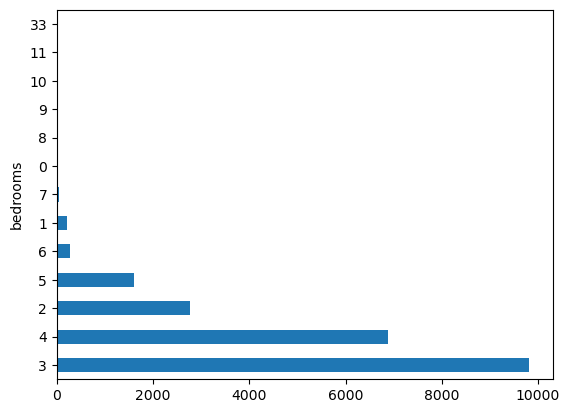

In [66]:
# todo horizontal bar chart of value counts

bedroom_counts = kc_housing['bedrooms'].value_counts()
#kc_housing['bedrooms'].plot(kind='barh', x='bedrooms', y= 'bedroom_counts',legend= False)

bedroom_counts.plot(kind='barh')

#bd_count_df = pd.DataFrame('bedrooms') #make series into dataframe
#bd_count_df.plot(kind='barh', y='count') #set the y column by using the name of the column to use for y values; x is not needed because it's the index (row labels) by default

### 8. Mean number of bedrooms

We've seen the bar chart of number of bedrooms, but what's the mean in all the data? Although we already found it earlier using `describe()`, if we want to see the mean of a single column, we can call `mean()` directly on that column, like this: 

`dataframe['column_name'].mean()`

In [49]:
# todo mean of bedrooms 
kc_housing['bedrooms'].mean()


3.37084162309721

### 9. Subsetting and selecting rows

Perhaps we're interested only in the data for houses with 4 or fewer bedrooms. Perhaps homes with 5 or more bedrooms are quite different and we're more interested in more typical homes. Can we create a copy of the dataset with only homes with fewer than 5 bedrooms? We can use filtering to do this. 

Try running a filter on the bedrooms column, like this: `dataframe['bedrooms'] < 5` 

What does the output look like? Write a sentence or two about it. 

In [50]:
# todo filter on bedrooms < 5 and write a few sentences on what the output looks like (should be True/Falses)

kc_housing['bedrooms']<5

0        True
1        True
2        True
3        True
4        True
         ... 
21608    True
21609    True
21610    True
21611    True
21612    True
Name: bedrooms, Length: 21613, dtype: bool

As far as I can see, the outputs are all True. 

**Note: Filtering returned to us a column of true/falses only! This isn't quite what we want.** But, we can use this intermediate output to create a new dataset that's a subset of the original by passing in the column of true/false to the original dataset. `Pandas` will know to return to us only the rows that align with True! This is pretty cool, try it yourself. It'll be something like this: 

`new_dataframe = old_dataframe[ dataframe['column_name'] < 5 ]`

In [61]:
# todo create subset dataframe 
kc_below5 = kc_housing[kc_housing['bedrooms']<5]


In [62]:
# todo sample on new dataframe to inspect whether the operation worked
kc_below5.sample(10)

,id,date,sales_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12723,2988800065,20141202T000000,281000.0,2,1.00,1280,12500,1.0,0,0,...,7,1060,220,1951,0,98178,47.4833,-122.237,1460,17771
11805,1698900075,20150415T000000,740000.0,4,2.75,2890,4000,1.5,0,0,...,9,2190,700,1931,0,98109,47.6419,-122.351,2280,4000
17039,4423100095,20140523T000000,670500.0,4,2.00,1590,6750,1.0,0,0,...,7,1590,0,1951,0,98102,47.6406,-122.317,2370,4500
9866,5398600075,20140825T000000,523500.0,2,2.00,1600,5969,1.0,0,0,...,7,800,800,1950,0,98116,47.5691,-122.394,1520,5969
21559,3438501329,20140520T000000,305000.0,2,2.50,1590,2656,2.0,0,0,...,7,1220,370,2009,0,98106,47.5489,-122.364,1590,2306
16280,7504110780,20140516T000000,645000.0,4,2.50,3160,11380,2.0,0,0,...,9,3160,0,1983,0,98074,47.6318,-122.039,2970,10385
15211,810000080,20150310T000000,915000.0,3,2.25,2390,2750,2.0,0,0,...,8,1580,810,1925,0,98109,47.6339,-122.354,2200,5160
15718,4038200480,20141201T000000,480000.0,3,1.00,1160,8800,1.0,0,0,...,7,1160,0,1959,0,98008,47.6112,-122.128,1750,8400
8364,8024200625,20150205T000000,414500.0,3,1.00,1050,6002,1.0,0,0,...,7,840,210,1941,0,98115,47.6988,-122.316,1180,6003
20198,7202300480,20141024T000000,775000.0,4,2.75,3500,6226,2.0,0,0,...,9,3500,0,2004,0,98053,47.6846,-122.045,3480,7222


### 10. Filter on multiple criteria

You don't have to limit yourself to filtering on a single criteria. Try it again, this time by combining any filtering criteria you'd like (e.g. bathrooms < 3 or sqft_living > 500). You pick the criteria! It will look like this: 

`new_dataframe = old_dataframe[ (dataframe['column_name'] < x)  &  (dataframe['second_column_name'] < x) ]`

Notice the use of `()` around each criteria! This is required. 

In [58]:
# todo mulitple filtering

new_kc= kc_housing[(kc_housing['bedrooms']<5) & (kc_housing['floors'] > 2) ]
new_kc.sample(15)

,id,date,sales_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7854,9129100040,20140825T000000,1000000.0,4,3.25,3320,8587,3.0,0,0,...,11,2950,370,2008,0,98103,47.6910,-122.337,1860,5668
19757,9268850030,20140707T000000,420000.0,3,2.25,1620,1075,3.0,0,0,...,8,1540,80,2009,0,98027,47.5405,-122.026,1620,1237
21200,1959700225,20150224T000000,720000.0,3,1.75,1370,1990,3.0,0,0,...,9,1370,0,2014,0,98102,47.6434,-122.324,1730,1990
3153,1336800015,20140521T000000,1506000.0,4,3.25,3660,5800,2.5,0,0,...,10,3360,300,1909,1995,98112,47.6283,-122.312,3240,5800
21586,2767604724,20141015T000000,505000.0,2,2.50,1430,1201,3.0,0,0,...,8,1430,0,2009,0,98107,47.6707,-122.381,1430,1249
6307,2524049056,20140714T000000,950000.0,3,3.25,3330,15093,2.5,0,0,...,9,3330,0,1988,0,98040,47.5395,-122.242,4340,20031
13786,9523100458,20140617T000000,549000.0,2,2.50,1380,953,3.0,0,0,...,9,1380,0,2006,0,98103,47.6654,-122.355,1430,3400
3724,9828702251,20140623T000000,579000.0,3,2.50,1640,1269,3.0,0,0,...,8,1640,0,2009,0,98112,47.6197,-122.300,1590,1231
20544,2771602428,20141029T000000,455000.0,3,2.50,1180,932,3.0,0,0,...,8,1180,0,2010,0,98119,47.6380,-122.375,1180,2632
7318,4358700188,20150331T000000,305000.0,3,2.50,1260,895,3.0,0,0,...,7,1160,100,2009,0,98133,47.7072,-122.336,1190,1095


### 11. Find null values for price_sold

Are there any houses where the sold price is null? To find out, do this: 

`dataframe[dataframe['column_name'].isnull()]`

In [67]:
# todo find null price_sold (there might be none!)

kc_housing[kc_housing['sales_price'].isnull()]


,id,date,sales_price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


### 12. Groupby and applying a calculation (e.g. mean, median)

Perhaps we want to know a statistic, such as mean, but grouped by some criteria. For example, what's the mean number of bathrooms if we group by number of bedrooms? What's the mean price if we group by number of bedrooms? The result will be a statistic (such as mean) for each group. So if we group by number of bedrooms, we'll get a mean sale price for 2-bedroom homes, a mean sale price for 3-bedroom homes, etc. 

To do this: 

`dataframe_name.groupby(['column_to_group_on']).mean()` will give us the mean, grouped by `column_to_group_on`

You try: 
* Group by number of bedrooms and calculate the median sale price
* Group by number of bathrooms and calculate the mean square footage

In [82]:
# todo create the two groupby's above

kc_housing.groupby(['bedrooms']).median('sales_price')


,id,sales_price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,,,,,,,,,,,,,,,,,,,
0,3.918400e+09,288000.0,0.00,1470.0,5900.0,2.0,0.0,0.0,3.0,7.0,1470.0,0.0,1990.0,0.0,98065.0,47.52610,-122.168,1810.0,7200.0
1,3.340402e+09,299000.0,1.00,780.0,5750.0,1.0,0.0,0.0,3.0,6.0,760.0,0.0,1940.0,0.0,98116.0,47.56210,-122.315,1360.0,5650.0
2,3.904100e+09,374000.0,1.00,1140.0,5244.0,1.0,0.0,0.0,3.0,7.0,1010.0,0.0,1948.0,0.0,98116.0,47.60285,-122.316,1430.0,5400.0
3,3.856905e+09,413000.0,2.00,1680.0,7629.5,1.0,0.0,0.0,3.0,7.0,1440.0,0.0,1976.0,0.0,98059.0,47.56505,-122.231,1720.0,7688.5
4,4.029950e+09,549997.5,2.50,2410.0,8100.0,2.0,0.0,0.0,3.0,8.0,2080.0,0.0,1980.0,0.0,98056.0,47.57110,-122.192,2190.0,8000.0
5,4.036400e+09,620000.0,2.75,2870.0,8925.0,2.0,0.0,0.0,3.0,8.0,2190.0,700.0,1975.0,0.0,98056.0,47.58310,-122.209,2280.0,8550.0
6,3.876051e+09,650000.0,3.00,2955.0,8696.0,2.0,0.0,0.0,3.0,8.0,2340.0,885.0,1966.0,0.0,98097.0,47.60245,-122.269,2095.0,8241.0
7,3.618730e+09,728580.0,3.50,3335.0,8836.0,2.0,0.0,0.0,3.0,8.0,2820.0,750.0,1964.5,0.0,98104.0,47.62120,-122.282,2215.0,8088.0
8,3.756900e+09,700000.0,3.25,3840.0,7500.0,2.0,0.0,0.0,3.0,8.0,2530.0,1300.0,1962.0,0.0,98105.0,47.63160,-122.303,1780.0,7624.0


In [74]:
kc_housing.groupby(['bathrooms']).mean('sqft_living')
# You just mentioned 'mean square footage', so I wasn't sure which variable to use. 

,id,sales_price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bathrooms,,,,,,,,,,,,,,,,,,,
0.00,4.725288e+09,4.481600e+05,0.300000,1636.800000,16286.600000,1.750000,0.000000,0.400000,2.900000,6.300000,1636.800000,0.000000,1971.200000,0.000000,98052.900000,47.519810,-122.049100,1899.000000,17288.100000
0.50,5.519975e+09,2.373750e+05,2.250000,1235.000000,5465.500000,1.250000,0.000000,0.000000,3.250000,6.250000,992.500000,242.500000,1948.000000,0.000000,98122.750000,47.546050,-122.279500,1545.000000,5844.750000
0.75,4.057760e+09,2.945209e+05,1.875000,896.611111,19462.083333,1.076389,0.083333,0.402778,3.472222,5.611111,829.388889,67.222222,1944.291667,110.375000,98091.111111,47.539242,-122.219014,1470.444444,19941.666667
1.00,4.456093e+09,3.470412e+05,2.635514,1181.123313,11423.722482,1.111760,0.002856,0.093977,3.455088,6.564123,1094.541018,86.582295,1944.423676,65.513499,98101.655504,47.563013,-122.273160,1451.188733,9859.194964
1.25,2.910064e+09,6.212167e+05,2.222222,1525.555556,4643.777778,1.888889,0.111111,1.000000,3.444444,8.000000,1248.888889,276.666667,1982.555556,0.000000,98103.555556,47.617211,-122.262111,1670.000000,5131.666667
1.50,4.538203e+09,4.093222e+05,3.038036,1544.630014,11058.798755,1.349931,0.002075,0.122407,3.476487,7.134855,1347.730982,196.899032,1960.047026,52.397649,98090.899032,47.560455,-122.257748,1619.198479,9728.132780
1.75,4.560155e+09,4.548961e+05,3.247047,1787.202428,15125.969816,1.143373,0.006234,0.213583,3.603675,7.259186,1406.654528,380.547900,1960.638451,87.609908,98080.311352,47.562919,-122.231092,1796.561680,13245.729331
2.00,4.586917e+09,4.578897e+05,3.308808,1796.669430,14227.944560,1.290674,0.002591,0.161140,3.578756,7.240933,1491.026425,305.643005,1961.254922,145.694301,98083.698964,47.556553,-122.233415,1736.832642,12044.885492
2.25,4.533461e+09,5.336768e+05,3.425989,2097.700537,14037.079629,1.604787,0.005862,0.188569,3.440645,7.805081,1755.058134,342.642404,1977.785051,47.801172,98066.507084,47.564339,-122.205412,2024.670249,12835.447973


### 13. Pair plots

So far we've explored the data by creating more data, such as summary statistics. Let's try our hand at visualization. 

We'll be using the plotting library `Seaborn`, specifically its ability to create super quick and easy pair plots. A pair plot is a matrix of all of our numeric columns against each other. Every row/column in the matrix is a scatter plot of one variable against another. Along the diagonal, where the row and column are the same variable, we will see a histogram of that variable. We already imported `Seaborn` as sns above. To get a pairplot, we need to do this: 

`sns.pairplot(dataframe_name)`

**But hold on! We don't want every column that's currently in our data.** For example, it doesn't make sense to include `id`. So let's create a new copy of our dataframe that includes only a few of the fields. To do this: 

`new_df = dataframe[['column_a','column_b','column_c']]`

Note the use of double `[[` -- this is because we're passing in a list (the inner set of `[]`) to our dataframe (outter set of `[]`). 

**NOTE: If this cell takes a _really_ long time to run, make sure you've taken a proper subset of the data.**

In [76]:
# todo select only a few meaningful columns and save to new smaller dataframe

new_df = kc_housing[['sales_price','bedrooms','floors']]

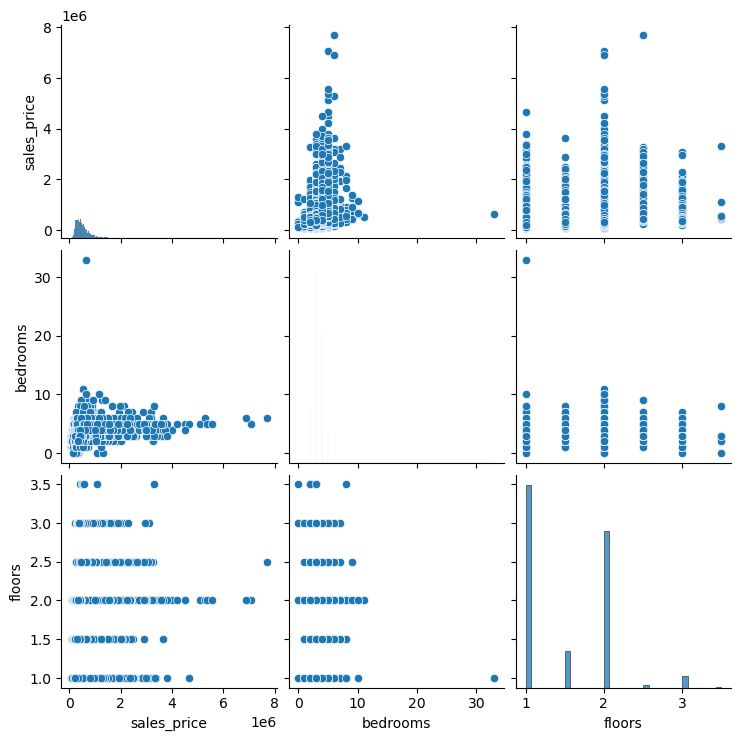

In [79]:
# todo seaborn pairplot on the new, smaller dataframe

sns.pairplot(new_df)

`todo` write a few sentences about what you can see from the pairplot
- Houses with only one floor are the most common. 
- Sales price tends to increase when there are more bedrooms.
- Floors and sales prices are hardly positively correlated. 

### 14. Seaborn correlation heatmap

The other viz common in EDA is a correlation heatmap. Correlation tells us how much two variables move in the same direction (or not). Correlation is measured for each pair of columns/fields. You can put this information in a table. But a table of correlations has a lot of numbers and can be hard to interpret, which is why a heatmap is commonly used. The heatmap just turns the numbers in a correlation table into colors, so that we can more quickly spot fields/columns that are highly correlated. High (or low) correlation will be important to us in a few weeks when we build models. For now, let's create the heatmap in `Seaborn` like this: 

`sns.heatmap(smaller_dataframe.corr(), vmin=0, vmax=1)`

Note the use of `.corr()`, which is what calculates our pairwise correlations.

<Axes: >

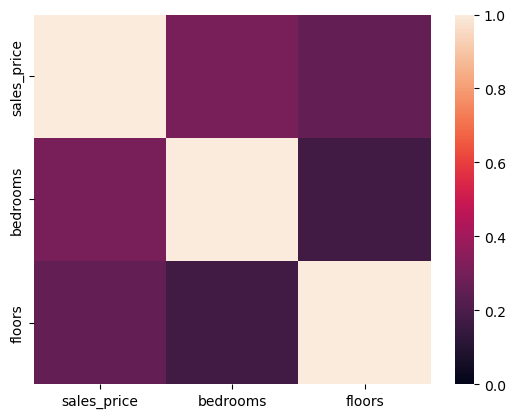

In [80]:
# todo heatmap on smaller dataframe

sns.heatmap(new_df.corr(), vmin=0, vmax=1)


### 15. What did we find out about our data? 

Write a few sentences about what you learned about home prices in Seattle using this EDA! Include what other measures, metrics, visualizations, etc you would want to see as part of an EDA of this data. If you're feeling ambitious, actually do these other explorations. 

`todo` summarize the EDA we just completed

Bedrooms and sales price of the house tend to have a slightly positive correlation, but the sales price and floors tend to have a weaker positive relationship. 

## 16. Optional extension

If you've gotten this far and it all seemed pretty easy, take 15 minutes to explore the data further. What other charts or tables can you create? What other functions are available on a groupby? Use google/documentation to find out! 

Can you return multiple aggregations from the same groupby statement, for example?

In [1]:
# todo: optional extension of the EDA by creating more plots, tables and using other groupby aggregations

